# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [14]:
# Installing the libraries with the specified version.

# Added the below path code to avoid WARNING: The scripts f2py, f2py3 and f2py3.10 are installed in '/root/.local/bin' which is not on PATH.
import os
os.environ['PATH'] += os.pathsep + '/root/.local/bin'

!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [15]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [16]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [18]:
# View the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [19]:
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

*   There are 5 numerical and 4 object datatype columns.
*   It took 133.6+ KB memory for the info execution.
*   There aren't any single column have a null value in the records. All have 1898 values.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [21]:
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: The minimum time to prepare once an order is placed is 20 minutes, with an average of 27.371970 minutes and maximum of 35 minutes for preparation.


### **Question 5:** How many orders are not rated? [1 mark]

In [23]:
unique_rating = data['rating'].unique()
print(unique_rating)

rated_missing = data['rating'].isnull().sum()

rate_not_given = (data['rating'] == 'Not given').sum()

print(f"There are {rated_missing + rate_not_given} orders not rated.")

['Not given' '5' '3' '4']
There are 736 orders not rated.


#### Observations:



*   There are 4 unique values in the resultset for rating ['Not given' '5' '3' '4']
*   There are 736 orders not rated.




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

There are 178 unique restaurants in the data.
There are 14 unique cuisine types in the data.
There are 2 unique days of the week in the data.


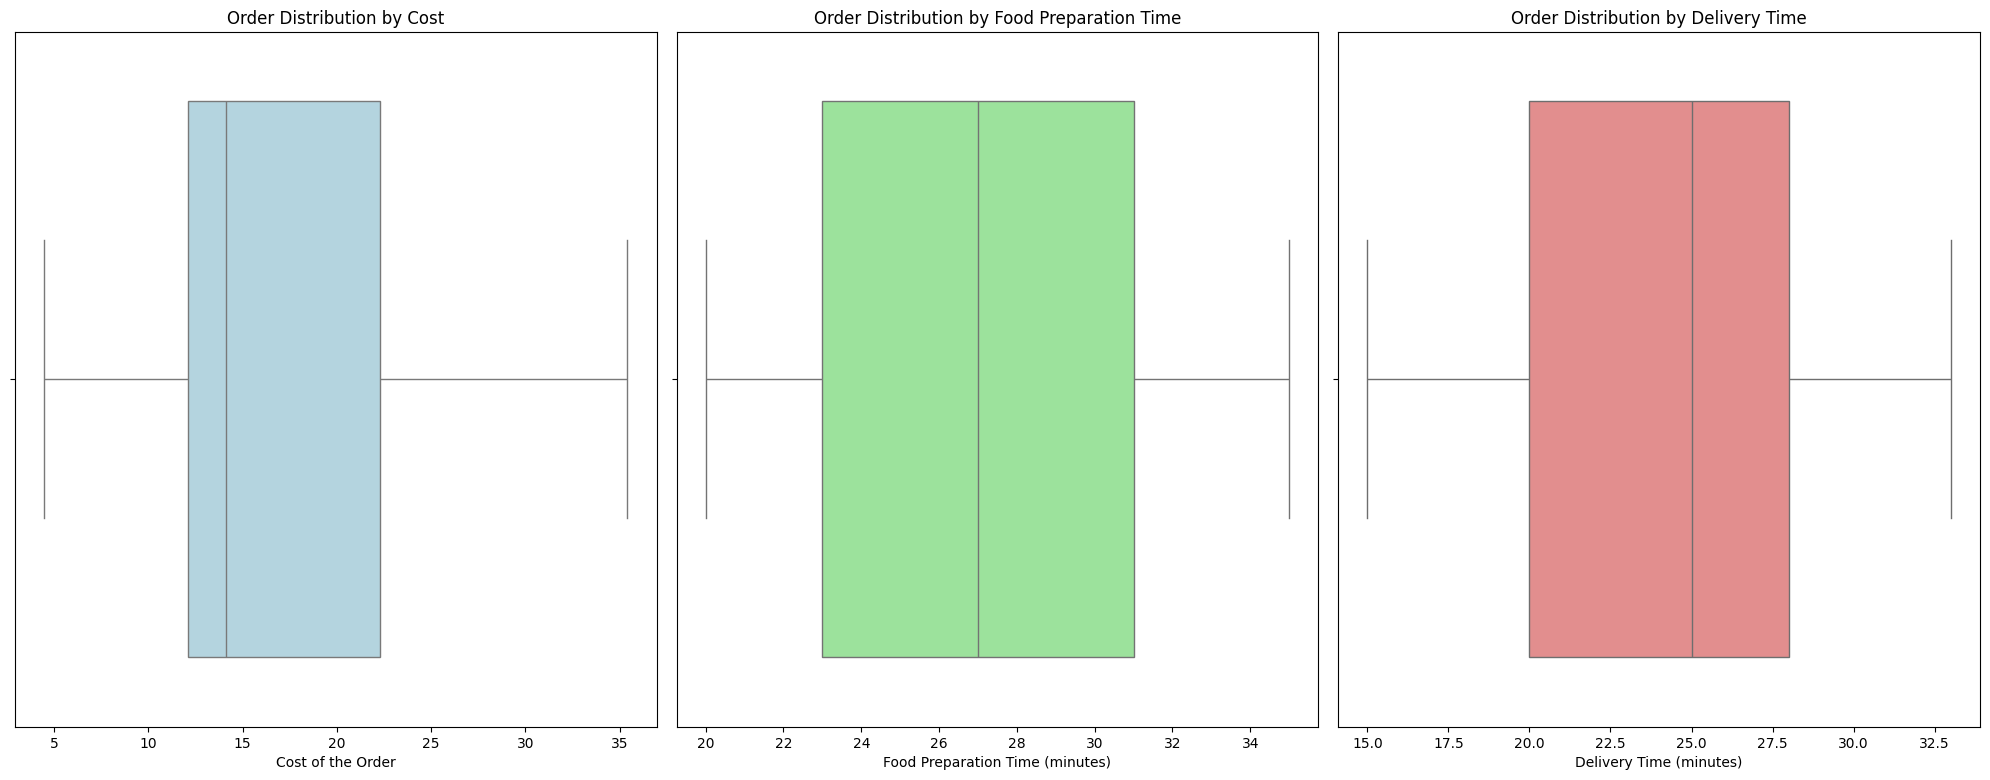

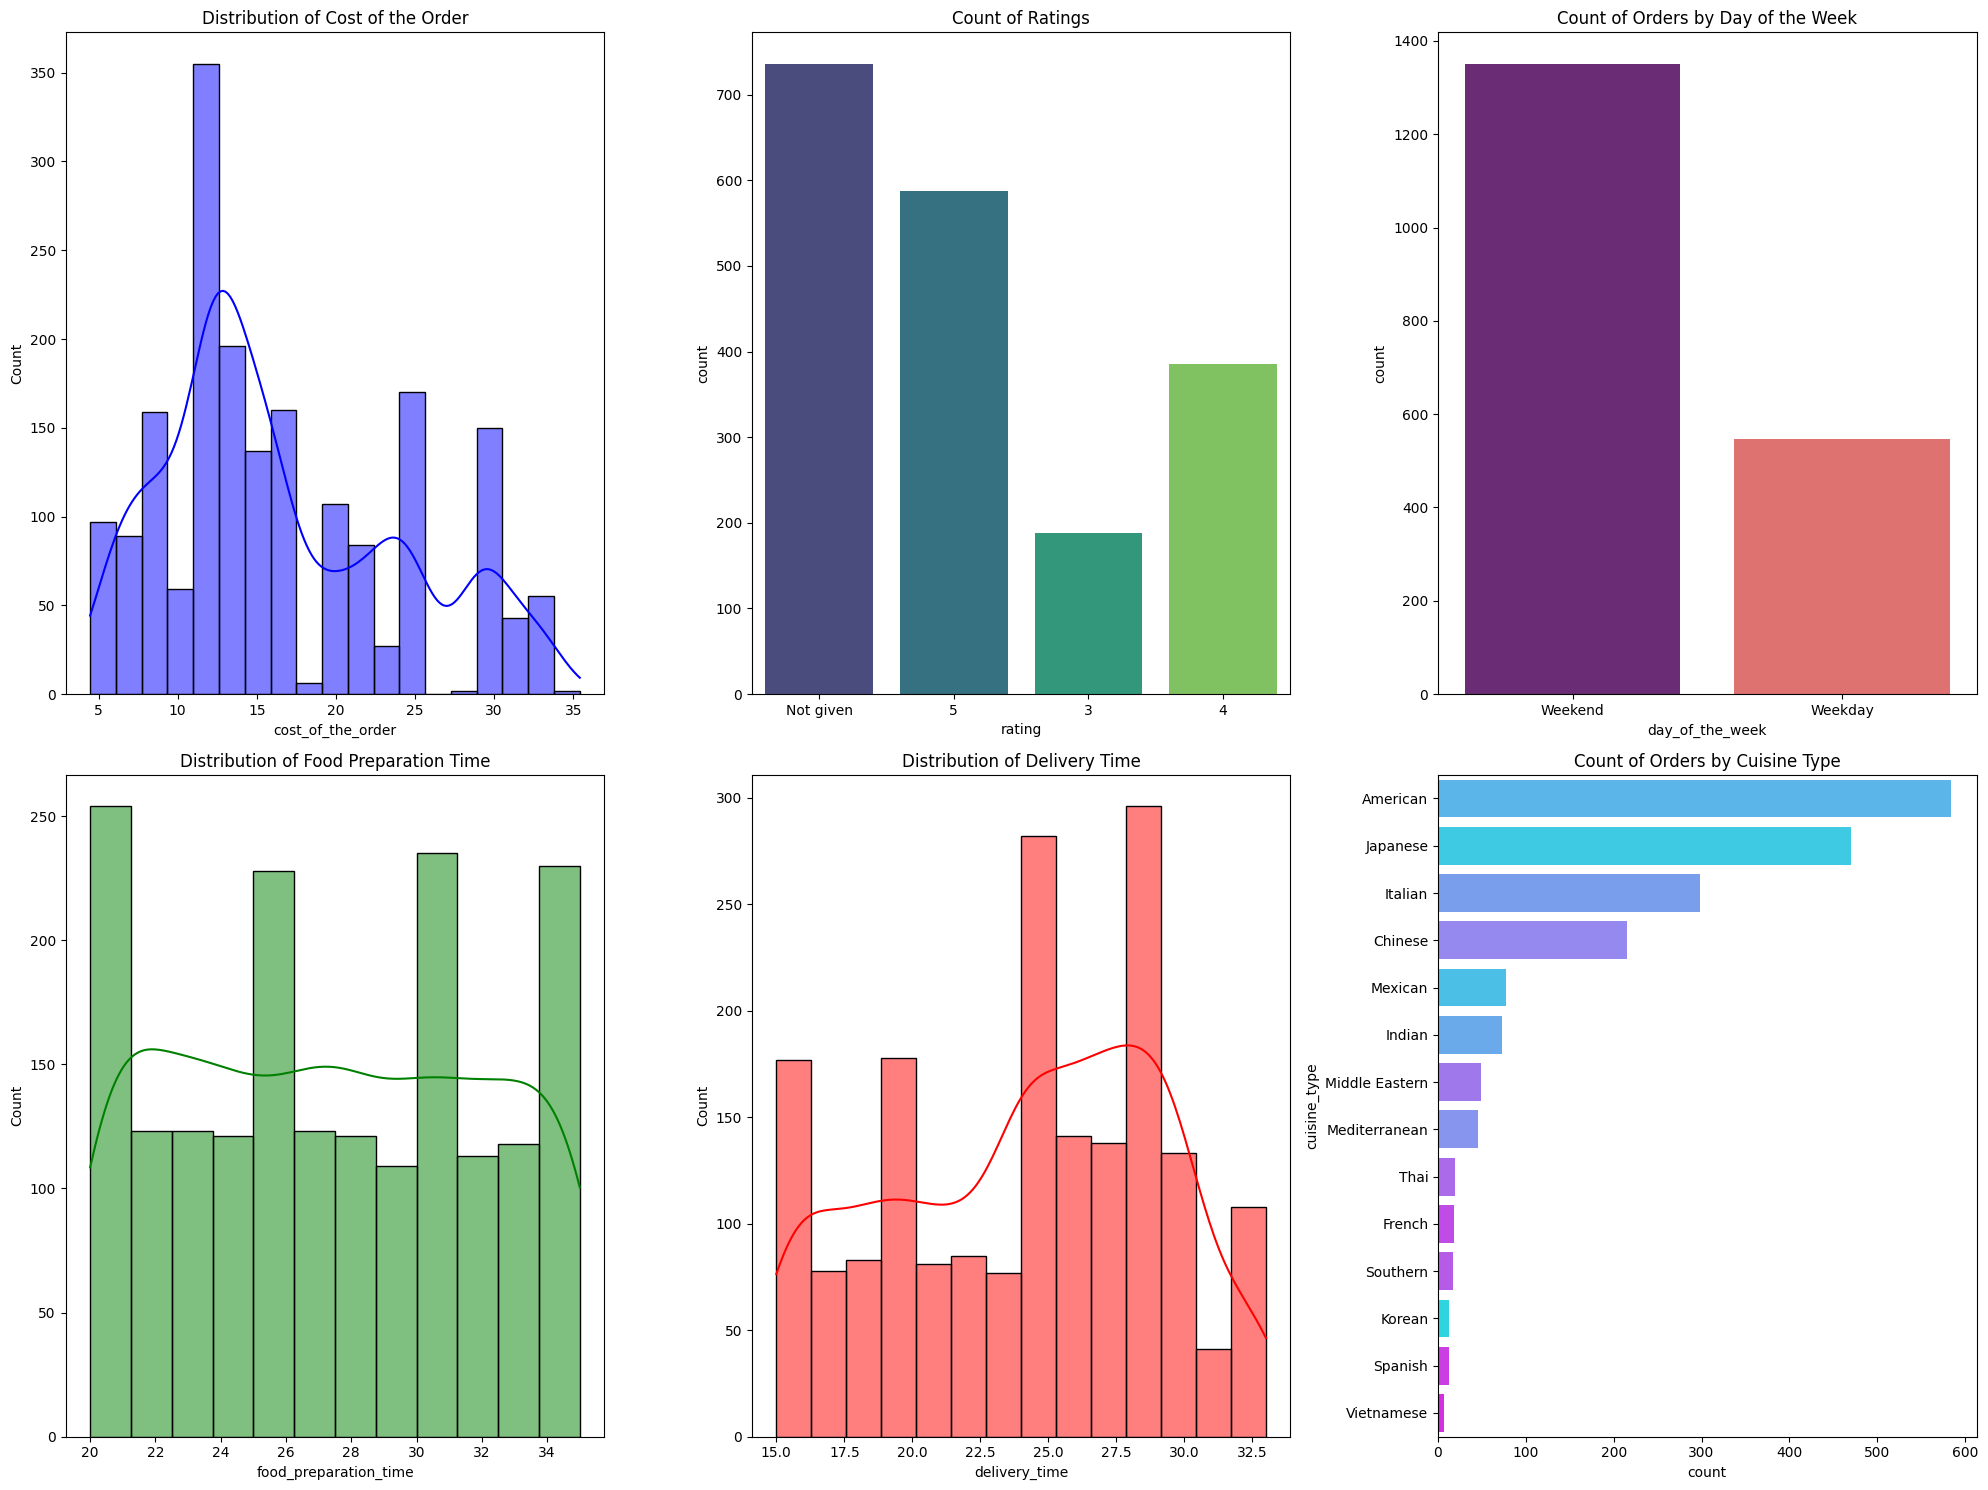

In [24]:
# let's check the total number of unique values in the Postcode column
restaurant_count = data['restaurant_name'].nunique()

cuisine_type_count = data['cuisine_type'].nunique()

day_of_the_week_count = data['day_of_the_week'].nunique()

print("There are", restaurant_count, "unique restaurants in the data.")
print("There are", cuisine_type_count, "unique cuisine types in the data.")
print("There are", day_of_the_week_count, "unique days of the week in the data.")

# Apply the matplotlib figure size for better view
plt.figure(figsize=(20, 15))

# Let's check how order distribution by cost of the order
plt.subplot(2, 3, 1)
sns.boxplot(data=data,x='cost_of_the_order', color='lightblue')
plt.title('Order Distribution by Cost')
plt.xlabel('Cost of the Order')

# Let's check how order distribution by food preparation time
plt.subplot(2, 3, 2)
sns.boxplot(data=data,x='food_preparation_time', color='lightgreen')
plt.title('Order Distribution by Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')

# Let's check how order distribution by delivery time
plt.subplot(2, 3, 3)
sns.boxplot(data=data,x='delivery_time', color='lightcoral')
plt.title('Order Distribution by Delivery Time')
plt.xlabel('Delivery Time (minutes)')

plt.tight_layout()

plt.show()

# Apply the matplotlib figure size for better view
plt.figure(figsize=(20, 15))

# Distribution of cost_of_the_order
plt.subplot(2, 3, 1)
sns.histplot(data['cost_of_the_order'], kde=True, color='blue')
plt.title('Distribution of Cost of the Order')

# Let's check how order distribution by rating
plt.subplot(2, 3, 2)
sns.countplot(x='rating', data=data, hue='rating', palette='viridis', legend=False)
plt.title('Count of Ratings')

# Let's check how order distribution by day of the week
plt.subplot(2, 3, 3)
sns.countplot(x='day_of_the_week', data=data, hue='day_of_the_week', palette='magma', legend=False)
plt.title('Count of Orders by Day of the Week')

# Let's check how order distribution of food_preparation_time
plt.subplot(2, 3, 4)
sns.histplot(data['food_preparation_time'], kde=True, color='green')
plt.title('Distribution of Food Preparation Time')

# Let's check how order distribution of delivery_time
plt.subplot(2, 3, 5)
sns.histplot(data['delivery_time'], kde=True, color='red')
plt.title('Distribution of Delivery Time')

# Let's check how order distribution by Cuisine Type
plt.subplot(2, 3, 6)
sns.countplot(y='cuisine_type', data=data, hue='cuisine_type', palette='cool',
              order=data['cuisine_type'].value_counts().index, legend=False)
plt.title('Count of Orders by Cuisine Type')

plt.tight_layout()

plt.show()

#### Observations:


1. There are 178 unique restaurants in the data.
2. There are 14 unique cuisine types in the data.
3. There are 2 unique days of the week in the data.
4. More than 50% of the order are greater than 10$.
5. 50% of the order takes 25 mins are more to deliver.
6. There are more than 700 orders have not provided any rating.
7. Weekend orders are more than double than the weekdays' orders.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [25]:
table = data.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending = False).reset_index()
table.rename(columns = {'order_id':'Orders Received'}, inplace = True)
table.rename(columns = {'restaurant_name':'Restaurant Name'}, inplace = True)
table.head()

,Restaurant Name,Orders Received
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations: The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
table = data[data['day_of_the_week'] == 'Weekend'].groupby(['cuisine_type'])['day_of_the_week'].count().sort_values(ascending = False).reset_index()
table.rename(columns = {'day_of_the_week':'Orders Received'}, inplace = True)
table.head()

,cuisine_type,Orders Received
0,American,415
1,Japanese,335
2,Italian,207
3,Chinese,163
4,Mexican,53


#### Observations: Based on the filtering applied to only weekend rows and the sort, the popular cuisines are American, Japanese, Italian, Chinese and Mexican.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [27]:
more_than_20 = data[data['cost_of_the_order'] > 20]
percentage = len(more_than_20)/len(data)*100
print(f'Percentage - {percentage:.2f}%')

Percentage - 29.24%


#### Observations: Percentage of the orders cost more than 20 dollars - 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
mean_of_delivery_time = data['delivery_time'].mean()
print(f'Mean Order Delivery Time - {mean_of_delivery_time:.2f} minutes')

Mean Order Delivery Time - 24.16 minutes


#### Observations: Mean Order Delivery Time - 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [29]:
table = data.groupby(['customer_id'])['order_id'].count().sort_values(ascending = False).reset_index()
table.rename(columns = {'order_id':'Orders Received'}, inplace = True)
table.rename(columns = {'customer_id':'Customer ID'}, inplace = True)
table.head(3)

,Customer ID,Orders Received
0,52832,13
1,47440,10
2,83287,9


#### Observations: The top 3 Customer IDs based on the number of orders placed are 52832, 47440 & 83287.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


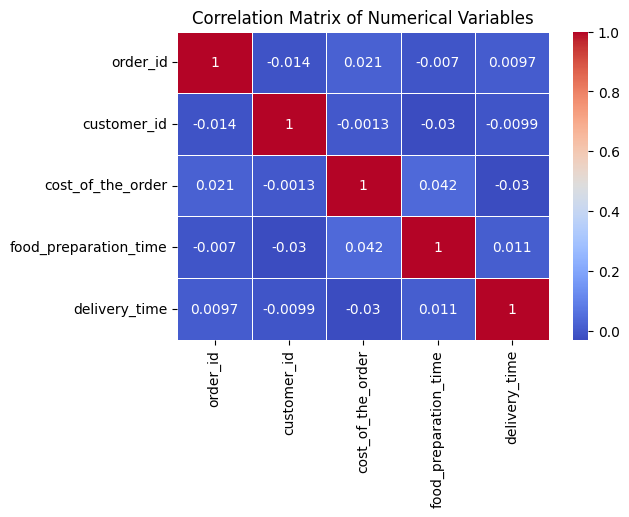

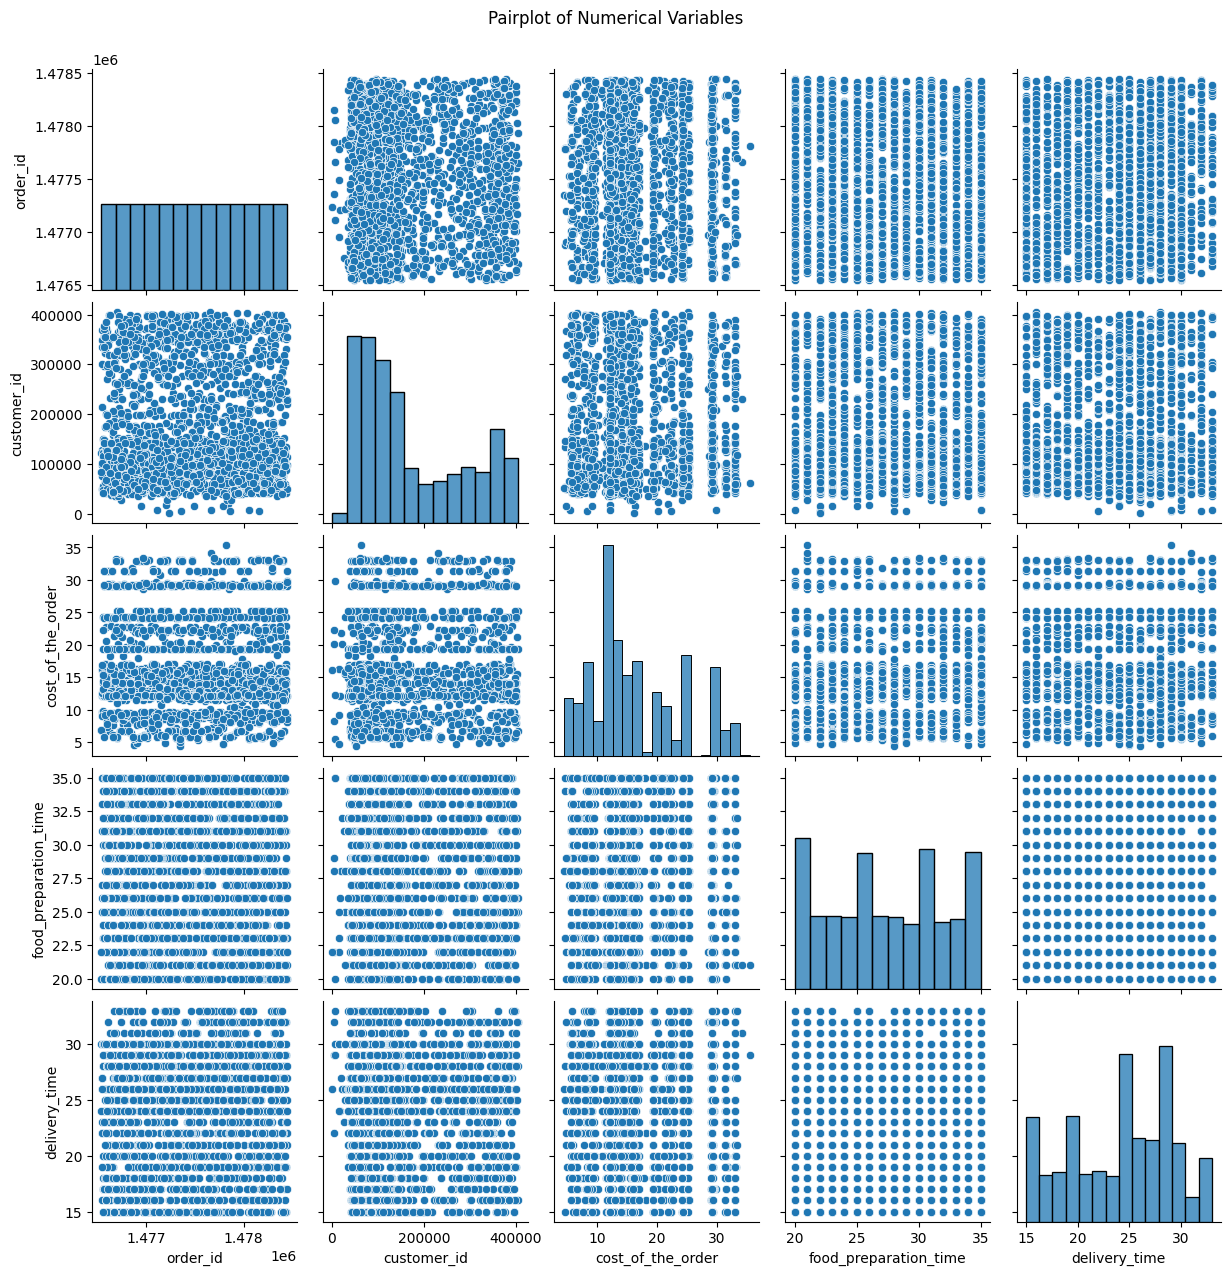

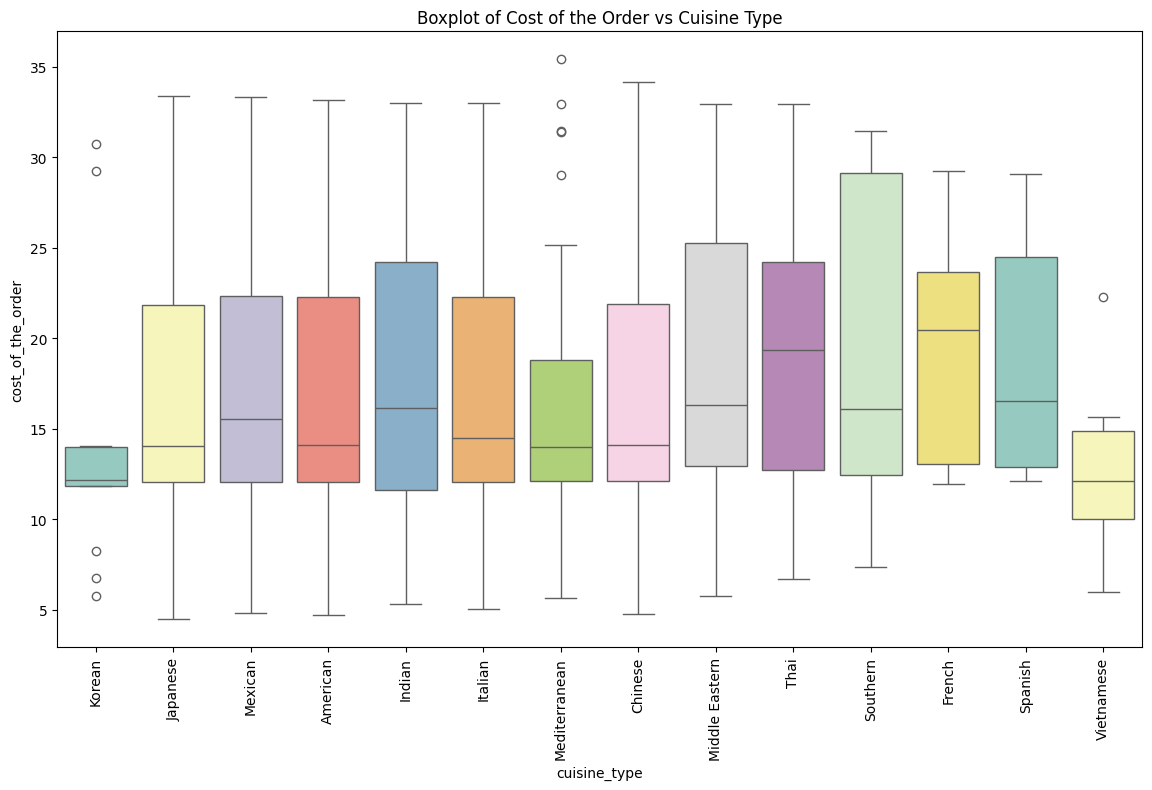

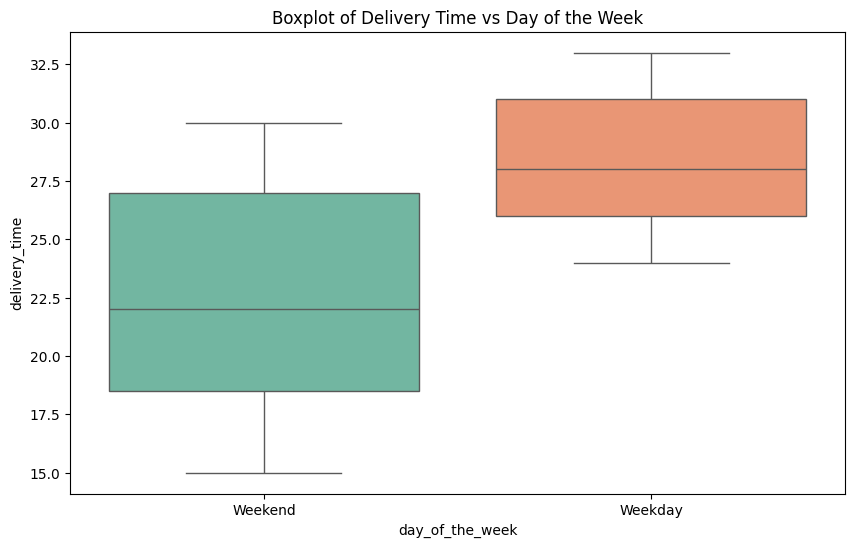

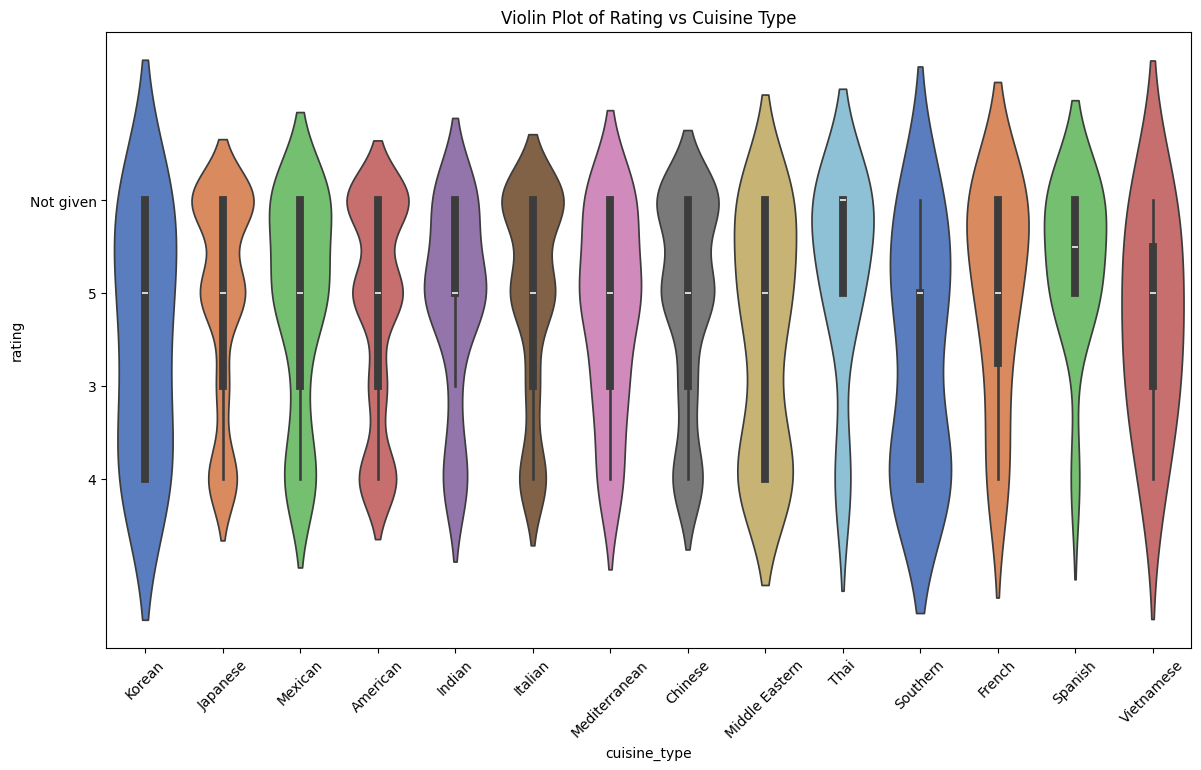

In [30]:
# Correlation Matrix for numerical variables
plt.figure(figsize=(6, 4))

numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Pairplot for numerical variables
sns.pairplot(numerical_data)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Boxplot to explore the relationship between 'cost_of_the_order' and 'cuisine_type'
plt.figure(figsize=(14, 8))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=data, palette='Set3', hue='cuisine_type', legend=False)
plt.title('Boxplot of Cost of the Order vs Cuisine Type')
plt.xticks(rotation=90)
plt.show()

# Boxplot to explore the relationship between 'delivery_time' and 'day_of_the_week'
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=data, palette='Set2', hue='day_of_the_week', legend=False)
plt.title('Boxplot of Delivery Time vs Day of the Week')
plt.show()

# Violin plot to explore the relationship between 'rating' and 'cuisine_type'
plt.figure(figsize=(14, 8))
sns.violinplot(x='cuisine_type', y='rating', data=data, palette='muted', hue='cuisine_type', legend=False)
plt.title('Violin Plot of Rating vs Cuisine Type')
plt.xticks(rotation=45)
plt.show()

#### Observations:


1.   Food preparation time shows high corelation with the cost of the order. This indicates that the cost is higher for the food that takes more time to prepare.
2. Mediterranean food has some outliers with the cost of the order.
3. Vietnamese & Korean food are the cheaper cuisines than all other cuisines.
4. All weekday orders have delivery time greater than 50% of the Weekend orders.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [31]:
copied_data = data.copy()
copied_data['rating'] = pd.to_numeric(copied_data['rating'], errors='coerce')

# Group by restaurant and calculate rating count and average rating
restaurant_stats = copied_data.groupby('restaurant_name').agg(
    rating_count=('rating', 'size'),
    average_rating=('rating', 'mean')
).reset_index()

# Filter restaurants based on the criteria: rating_count > 50 and average_rating > 4
eligible_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) &
    (restaurant_stats['average_rating'] > 4)
]

# Display the eligible restaurants
print(eligible_restaurants)
print('The restaurants based on the criteria: rating_count > 50 and average_rating > 4 are: ')
print(eligible_restaurants.restaurant_name.unique())

               restaurant_name  rating_count  average_rating
20   Blue Ribbon Fried Chicken            96        4.328125
21           Blue Ribbon Sushi           119        4.219178
109                       Parm            68        4.128205
121           RedFarm Broadway            59        4.243902
122             RedFarm Hudson            55        4.176471
136                Shake Shack           219        4.278195
153          The Meatball Shop           132        4.511905
The restaurants based on the criteria: rating_count > 50 and average_rating > 4 are: 
['Blue Ribbon Fried Chicken' 'Blue Ribbon Sushi' 'Parm' 'RedFarm Broadway'
 'RedFarm Hudson' 'Shake Shack' 'The Meatball Shop']


#### Observations: The restaurants based on the criteria: rating_count > 50 and average_rating > 4 are 'Blue Ribbon Fried Chicken' 'Blue Ribbon Sushi' 'Parm' 'RedFarm Broadway''RedFarm Hudson' 'Shake Shack' 'The Meatball Shop'.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [32]:
data['revenue'] = np.where(
    data['cost_of_the_order'] > 20,
    data['cost_of_the_order'] * 0.25,
    np.where(data['cost_of_the_order'] > 5,
             data['cost_of_the_order'] * 0.15,
             0)
)

# Calculate the total net revenue
total_revenue = data['revenue'].sum()

# Display the total net revenue
print(f"Total Net Revenue: ${total_revenue:.2f}")

Total Net Revenue: $6166.30


#### Observations: Total Net Revenue: $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [33]:
# Calculate the total time taken
data['total_time'] = data['food_preparation_time'].fillna(0) + data['delivery_time'].fillna(0)

percentage_over_60_minutes = (data['total_time'] > 60).mean() * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60_minutes:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations: Percentage of orders taking more than 60 minutes: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [34]:
# Calculate the mean delivery time for weekdays and weekends directly
mean_delivery_time = data.groupby('day_of_the_week')['delivery_time'].mean()

# Display the mean delivery time
print(mean_delivery_time)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations: Yes the mean delivery time varies between weekend and weekday as follows:
Weekday    28.340037
Weekend    22.470022

Weekdays it takes 6 mins longer than on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The top 5 restaurants (Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm) and the most popular weekend cuisines (American, Japanese, Italian, Chinese and Mexican) indicate clear customer preferences. Boosting the ads & Promoting these restaurants and cuisines further could increase order volume.
*  Longer delivery time on weekdays affects customer satisfaction as people will be busy during their workday and food delay will cause them more stress.
*  736 orders are not rated, so significant insights missing related to customer satisfaction.
* The company generated 6166.30 dollars in revenue from the two-tier commission model (25% on orders above 20 dollars and 15% for orders above 5 dollar).

### Recommendations:

* Encourage rating by providing points or small discounts which will provide us more and accurate insights.
* Since weekend traffic is higher, offering limited discounts on less popular cuisines drives more order.
* Optimizing weekday delivery logistics could improve customer satisfaction.
* Given the popularity of American, Japanese, and Italian cuisines, consider partnering with restaurants that specialize in these cuisines to offer targeted discounts or exclusive deals.
* For top customers, offer loyalty programs or exclusive discounts to incentivize them to order more frequently. Customers like the top 3 frequent ones (IDs: 52832, 47440, 83287) can be retained with tailored offers.
* Restaurants with high average ratings and significant order counts (like Blue Ribbon Fried Chicken and Shake Shack) should be highlighted in the app or given premium placement.


By prioritizing faster delivery times, encouraging more customer feedback, and capitalizing on popular cuisines and top-performing restaurants, FoodHub can elevate the customer experience and drive business growth.

---